In [1]:
#imports
import csv
import aligner_ultra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict as Ord

#magic
%matplotlib inline
%load_ext autoreload

In [2]:
#import tab sep values file
df = pd.read_csv('All_WT_for_coopfit_tsv.csv', sep='\t')

#put saturation data column headers into list; discard receptor concentration column
colist = df.columns.tolist()[1:]

#create list of dataframes for each [lig]-sat data set for each receptor conc. and ensure sort oder (to avoid potting issues)
dflist = [df[['[egf]', i]].dropna().sort_values(by='[egf]') for i in colist]

#make headers uniform 
colist_low = [colist[i].lower() for i in range(len(colist))]

#apply uniform headers to dataframe
dflist_low = [dflist[i].rename(columns={colist[i]:colist_low[i]}) for i in range(len(colist_low))]

#import total receptor concentrations
with open('rtotswt.csv', 'r') as f:
    g = csv.reader(f)
    rtots = (list(g))
    
#convert to numerical values (floats)
rtots = [float(rtots[i][0]) for i in range(len(rtots))]

EGFR_WT_RTOTS_ord = Ord(zip(colist_low,rtots))

EGFR_WT_DICT_ord = Ord(zip(colist_low,dflist_low))

keylist = list(EGFR_WT_DICT_ord.keys())

keyed_sats = np.array([EGFR_WT_DICT_ord[key][key].as_matrix() for key in keylist])

keyed_ligs = np.array([EGFR_WT_DICT_ord[key]['[egf]'].as_matrix() for key in keylist])

keyed_rtots = np.array([EGFR_WT_RTOTS_ord[key] for key in keylist])

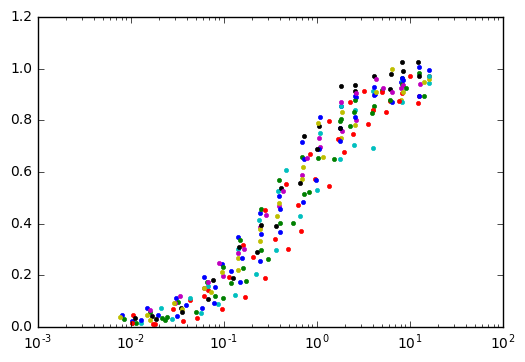

In [3]:
for i in range(len(keyed_ligs)):
    plt.semilogx(keyed_ligs[i],keyed_sats[i],'.')

In [8]:
list(EGFR_WT_DICT_ord.keys())[:6]

['24k', '43k', '92k', '120k', '231k', '447k']

In [13]:
list(EGFR_WT_DICT_ord.keys())[6:11]

['20k', '46k', '187k', '256k', '1200k']

In [14]:
list(EGFR_WT_DICT_ord.keys())[11:]

['12k', '82k', '107k', '387k', '502k', '1600k']

In [20]:
EGFR_WT_DICT_ord['12k'].values[:,0]

array([  0.01631733,   0.033773  ,   0.0684047 ,   0.08990054,
         0.1651807 ,   0.2820976 ,   0.4317393 ,   0.7783454 ,
         1.068384  ,   1.80568   ,   2.669588  ,   4.307405  ,
         6.418342  ,   8.512644  ,  12.84846   ])